In [1]:
# Importing the libraries 



import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as mno
import datetime 


# for interactivity 

import ipywidgets as widgets 
from ipywidgets import interact
from ipywidgets import interact_manual


# background style for the plots
plt.style.use('fivethirtyeight')


In [2]:
# Reading the data

# reading the data and checking the computation time 

%time data = pd.read_csv("data-1 (1).csv")
data.head()
data.shape



CPU times: total: 547 ms
Wall time: 666 ms


(18207, 89)

In [3]:
# column name present in the data 

data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
# checking the first 5 rows and columns 

data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
# numerical columns describe 

data.iloc[:, 2:].describe().style.background_gradient(cmap= 'cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
# let's check the descriptive statistics for the categorical data as well 

data.iloc[:, 13:].describe(include= 'object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,...,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,...,660,660,660,713,669,634,634,634,669,557


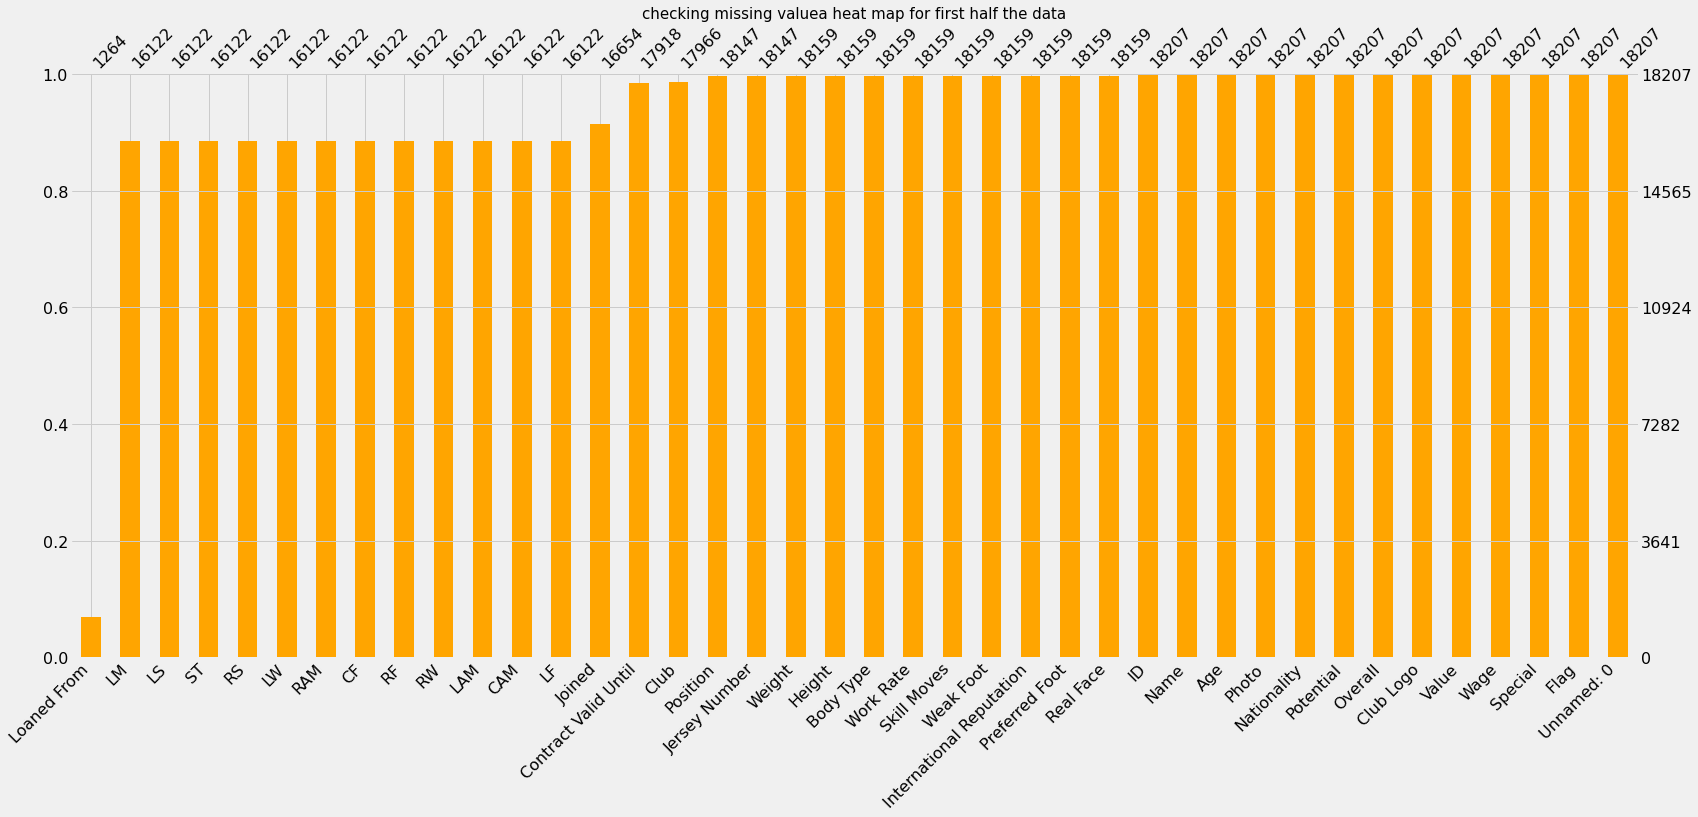

In [7]:
# Cleaning data

# checking if the data contains any null value 
# visulize missing values as a matrix 

mno.bar(data.iloc[:, :40],
       color= 'orange',
       sort='ascending')
plt.title('checking missing valuea heat map for first half the data', fontsize=15)
plt.show()

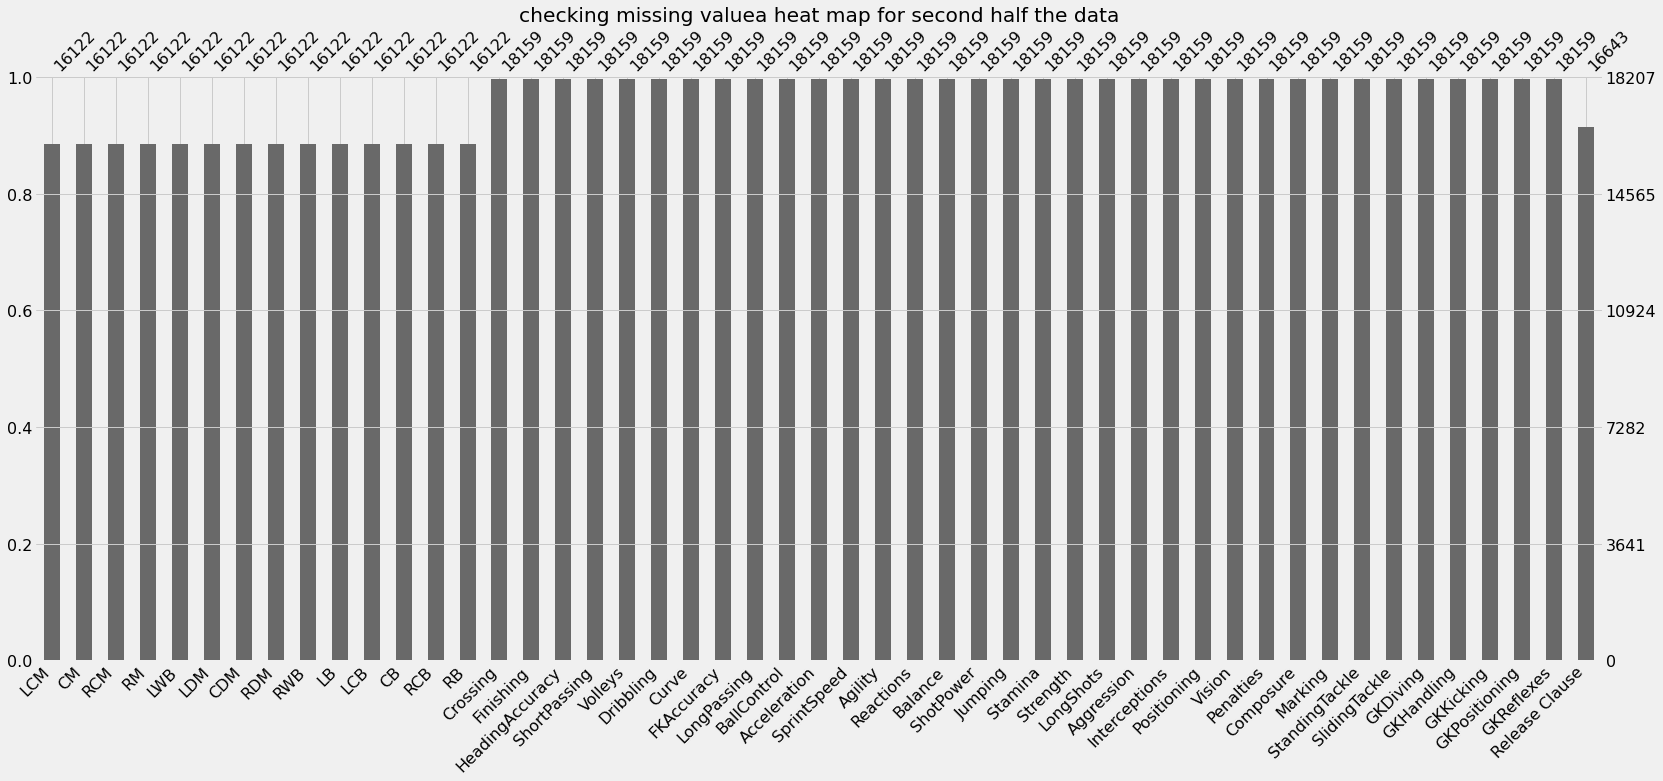

In [8]:
# visulize missing values as a matrix  for seconf half data 

mno.bar(data.iloc[:, 40:])
plt.title("checking missing valuea heat map for second half the data")
plt.show()



In [14]:
# feeling the missing Bellevue for the continued value goals for proper data visualization
data['ShortPassing'].fillna(data['ShortPassing'].mean(),inplace=True)
data['Volleys'].fillna(data['Volleys'].mean(),inplace=True)
data['Dribbling'].fillna(data['Dribbling'].mean(),inplace=True)
data['Curve'].fillna(data['Curve'].mean(),inplace=True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(),inplace=True)
data['LongPassing'].fillna(data['LongPassing'].mean(),inplace=True)
data['BallControl'].fillna(data['BallControl'].mean(),inplace=True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(),inplace=True)
data['Finishing'].fillna(data['Finishing'].mean(),inplace=True)
data['Weight'].fillna('200lbs',inplace=True)
data['Contract Valid Until'].fillna(2019,inplace=True)
data['Height'].fillna("5'11",inplace=True)
data['Loaned From'].fillna('None',inplace=True)
data['Joined'].fillna('Jul 1,2018',inplace=True)     
data['Jersey Number'].fillna(8,inplace=True)
data['Body Type'].fillna('Normal',inplace=True)
data['Position'].fillna('ST',inplace=True)
data['Club'].fillna('No Club',inplace=True)
data['Work Rate'].fillna('Medium/Medium',inplace=True)
data['Skill Moves'].fillna(data['Skill Moves'].median(),inplace=True)
data['Weak Foot'].fillna(3,inplace=True)
data['Preferred Foot'].fillna('Right',inplace=True)     
data['International Reputation'].fillna(1,inplace=True)     
data['Wage'].fillna('200k',inplace=True)
data.fillna(0,inplace=True)

# let's check whether the data still has any missing values 
data.isnull().sum().sum()

0

In [ ]:
# feature Enginiering 

# creating new feature by aggrigating the feature 

def defending(data):
    return int(round((data[['Marking','StandingTackle','SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy','Dribbling','Curve']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing','ShortPassing','LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration','SprintSpeed','Agility','Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance','Jumping','Stamina','Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential','Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing','Volleys','FKAccuracy','ShotPower','LomgShots','Penalties']].mean()).mean()))

In [45]:
# Adding thses categories to the data

data['Defending']=data.apply(defending, axis=1)
data['General']=data.apply(general, axis=1)
data['Mental']=data.apply(mental, axis=1)
data['Passing']=data.apply(passing, axis=1)
data['Mobility']=data.apply(mobility, axis=1)
data['Power']=data.apply(power, axis=1)
data['Rating']=data.apply(rating, axis=1)
data['Shooting']=data.apply(shooting, axis=1)

# let's check the column name in the data after adding new feature 
data.columns

KeyError: "['LomgShots'] not in index"

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


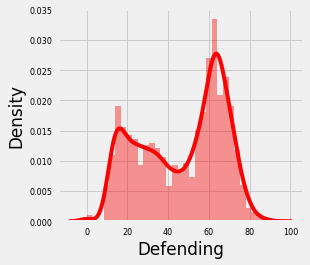

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


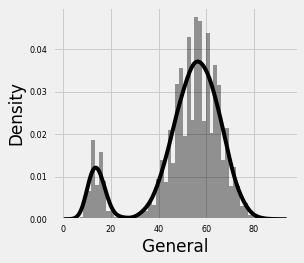

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


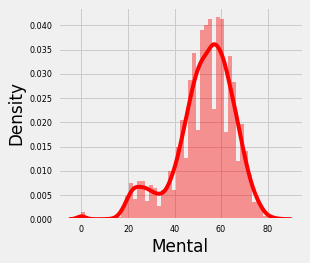

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


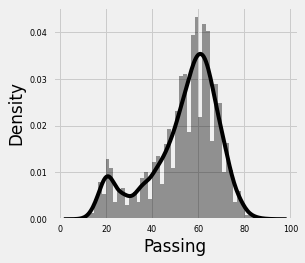

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


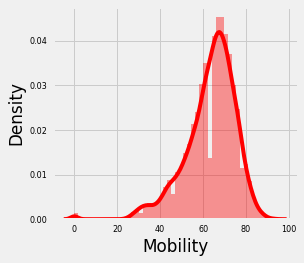

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


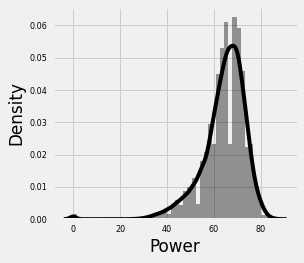

KeyError: 'Shooting'

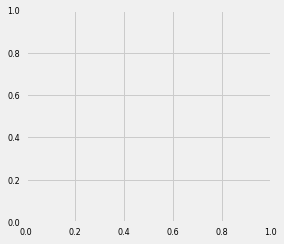

In [44]:
# Lets check the Distribution of Scores of Different Skills plt.rcParams[ figure.figsize] (18, 8)

plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2, 4, 1)
sns.distplot(data['Defending'], color = 'red')
plt.show()

plt.subplot(2, 4, 2)
sns.distplot(data['General'], color ='black')
plt.show()

plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color ="red") 
plt.show()

plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color ="black")
plt.show()

plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = "red")
plt.show()

plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black') 
plt.show()

plt.subplot(2, 4, 7) 
sns.distplot(data['Shooting'], color = "red")
plt.show()

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


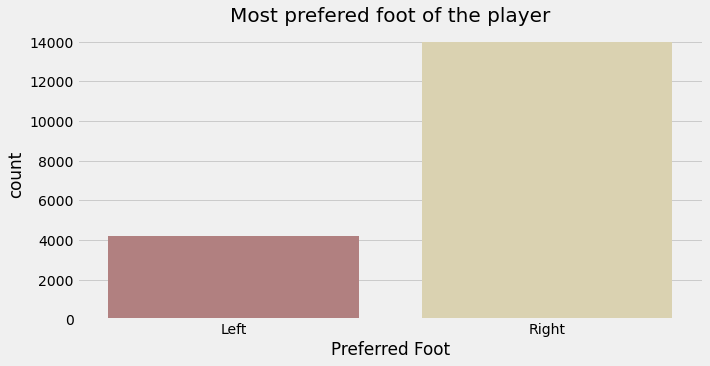

In [13]:
# Comparison of preferred foot over the different players

plt.rcParams['figure.figsize']=(10,5)
sns.countplot(data['Preferred Foot'],palette="pink")
plt.title("Most prefered foot of the player",fontsize=20)
plt.show()



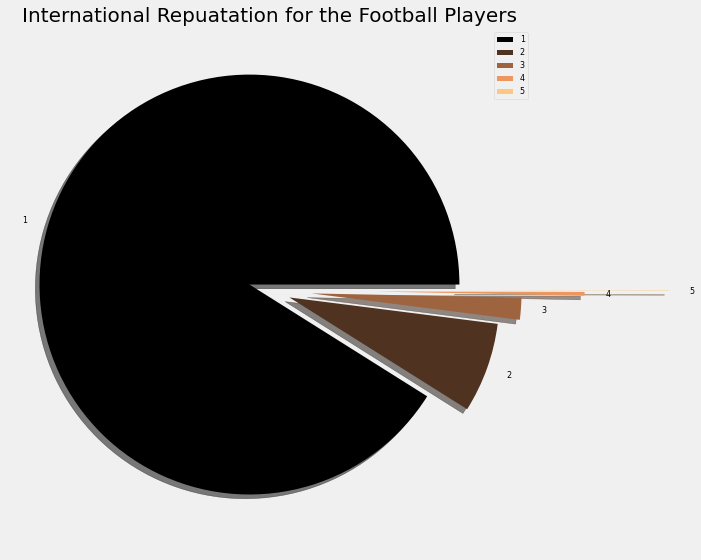

In [43]:
#plotting a pie chart to represent share of international reputation

labels= ['1', '2', '3', '4', '5']
sizes= data['International Reputation'].value_counts()
colors=plt.cm.copper(np.linspace (0, 1, 5))
explode =[0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels=labels, colors =colors, explode=explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()




In [42]:
#data['International Reputation']


print(data[data['International Reputation'] == 5.0] [['Name','Nationality','Overall']])
print("------------------------------------------------------")
print(data[data['International Reputation'] == 5.0] [['Name','Nationality','Overall']].sort_values(by='Overall'))
print("------------------------------------------------------")


                  Name Nationality  Overall
0             L. Messi   Argentina       94
1    Cristiano Ronaldo    Portugal       94
2            Neymar Jr      Brazil       92
7            L. Suárez     Uruguay       91
22            M. Neuer     Germany       89
109     Z. Ibrahimović      Sweden       85
------------------------------------------------------
                  Name Nationality  Overall
109     Z. Ibrahimović      Sweden       85
22            M. Neuer     Germany       89
7            L. Suárez     Uruguay       91
2            Neymar Jr      Brazil       92
0             L. Messi   Argentina       94
1    Cristiano Ronaldo    Portugal       94
------------------------------------------------------


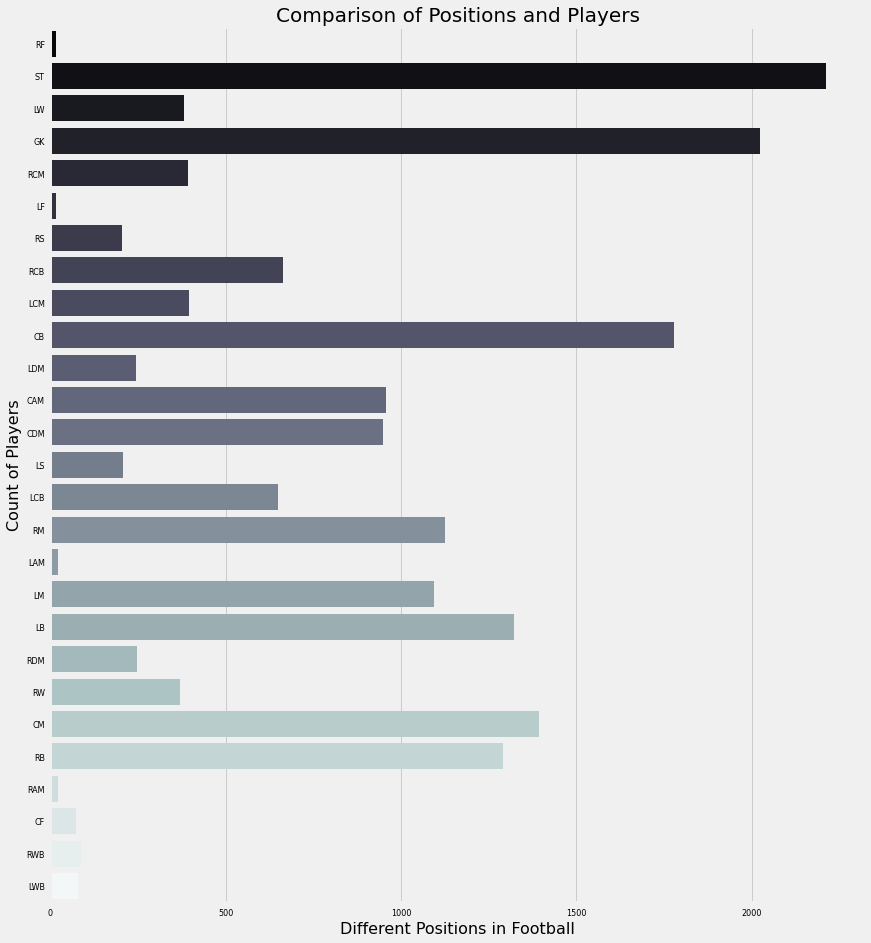

In [41]:

#different positions acquired by players

plt.figure(figsize =(13, 15)) 
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = data, palette = "bone")
ax.set_xlabel(xlabel = 'Different Positions in Football' , fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


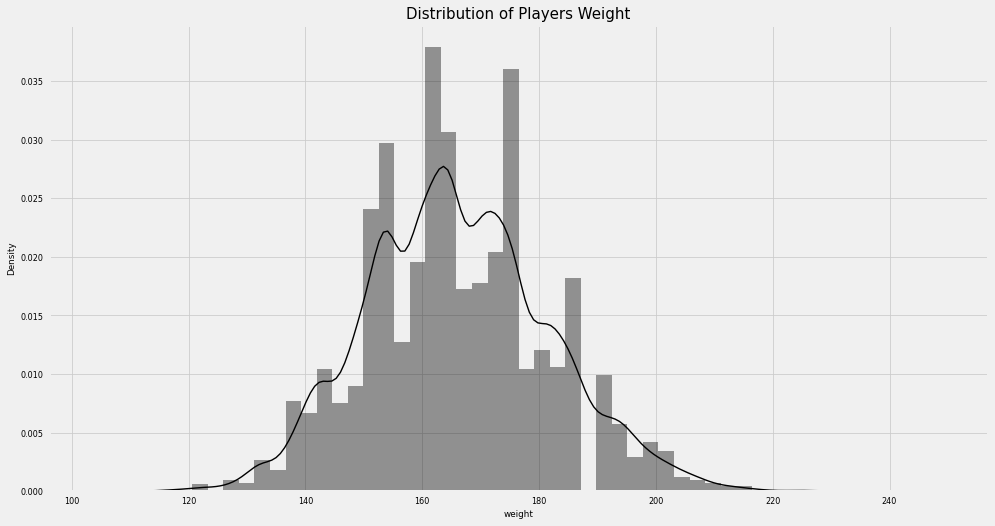

In [40]:
#defining a function for cleaning the weight data

#value=data['Weight'].to_list()
def extract_value_from(value): 
    out=value.replace("lbs","")
    return float(out)

#applying the function to weight column 
data["weight"] = data['Weight'].apply(lambda x: extract_value_from(x))

#plotting the distribution of weight of the players
sns.distplot(data['weight'], color="black") 
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

In [39]:
# defining a fuc to clean the wage of the players

def extract_value_from(column):
    out=column.replace('€','')
    if 'M' in out:
        out = float(out.replace("M",''))*1000000
    elif 'K' in column:
        out=float(out.replace('K',''))*1000
    return float(out)

In [37]:
# applying the function to the wage and value column

data['value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

#visualizing the data
plt.rcParams['figure.figsize']= (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'], color='violet')
plt.title('Distribution of value of the Players', fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color ='purple')
plt.title('Distribution of Hages of the Players', fontsize =15)
plt.show()

NameError: name 'extract_value_from' is not defined

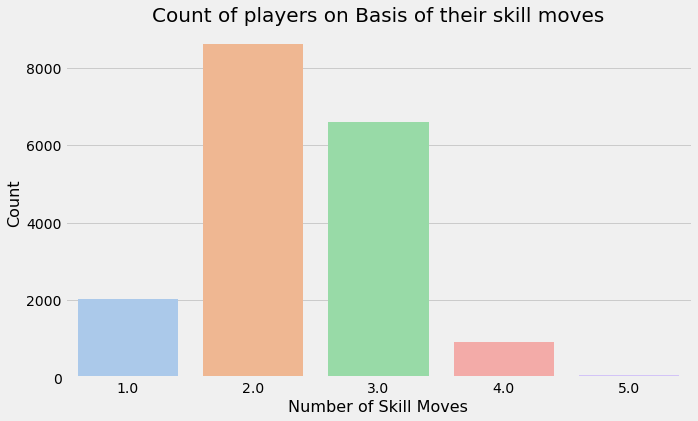

In [12]:
#SKILL Moves of Players

plt.figure(figsize = (10, 6))

ax=sns.countplot(x= 'Skill Moves', data=data, palette='pastel') 
ax.set_title(label='Count of players on Basis of their skill moves', fontsize=20)


ax.set_xlabel(xlabel='Number of Skill Moves', fontsize=16) 
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.show()



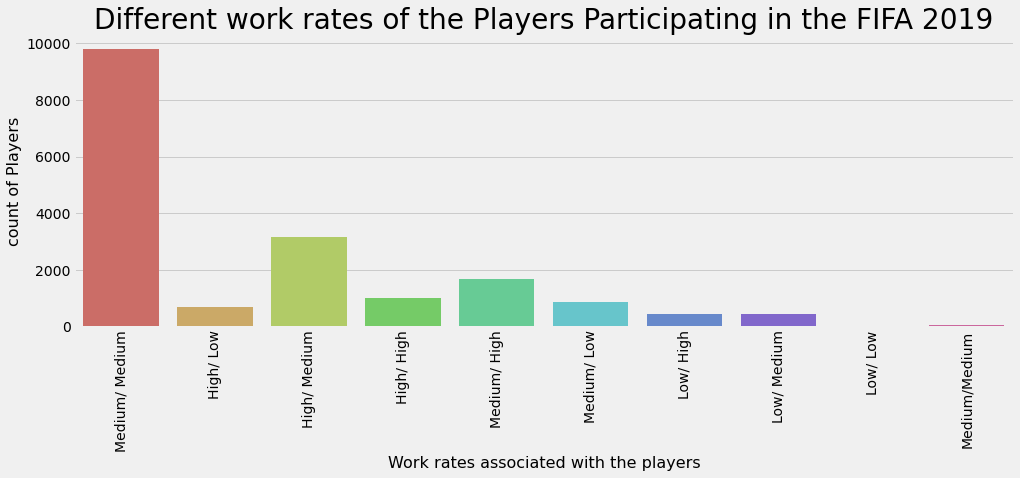

In [22]:
# To show Different work rate of the players participating in the FIFA 2019 

plt.figure(figsize =(15, 5)) 
plt.style.use('fivethirtyeight')

plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 28)

sns.countplot(x = 'Work Rate', data = data, palette = 'hls') 
plt.xlabel('Work rates associated with the players', fontsize = 16) 
plt.xticks(rotation =90)
plt.ylabel('count of Players', fontsize= 16)
plt.show()

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


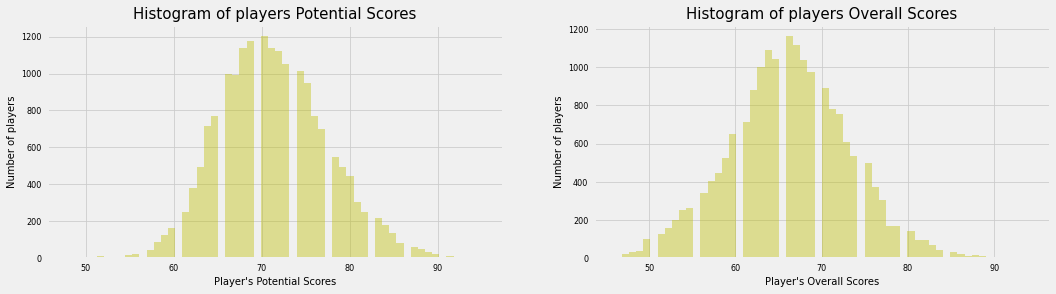

In [23]:
# To show Different potential scores of the players participating in the FIFA 2019

plt.figure(figsize =(16, 4)) 
plt.style.use('seaborn-paper')


plt.subplot(1, 2, 1)
x=data.Potential
ax = sns.distplot(x, bins=58, kde=False, color= 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize=10) 
ax.set_ylabel(ylabel= 'Number of players', fontsize=10)
ax.set_title(label='Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y=data.Overall
ax= sns.distplot(y, bins =58, kde =False, color = 'y')
ax.set_xlabel(xlabel ="Player's Overall Scores", fontsize =10) 
ax.set_ylabel(ylabel ='Number of players', fontsize = 10)
ax.set_title(label ='Histogram of players Overall Scores', fontsize= 15)
plt.show()

C:\Users\Sandeep Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


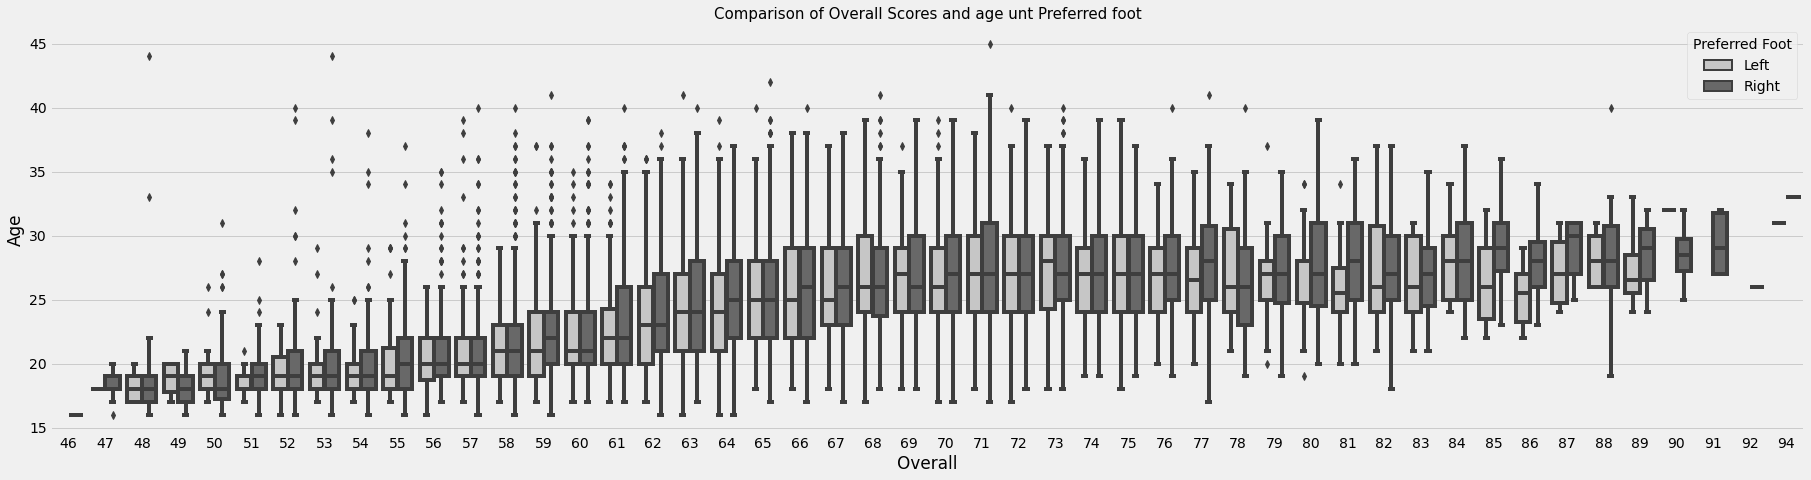

In [21]:
#violine plot


plt.rcParams['figure.figsize'] = (28, 7) 
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = "Greys")
plt.title('Comparison of Overall Scores and age unt Preferred foot', fontsize=15)
plt.show()

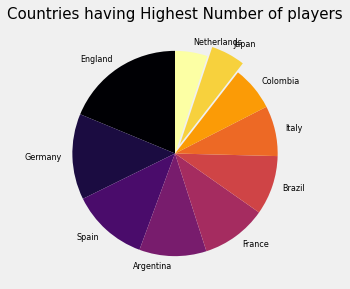

In [24]:
 # Countries with most player

# picking up the countries with highest number of players to compare their overall scores 

data['Nationality'].value_counts().head (10).plot(kind='pie', cmap='inferno', startangle= 90, explode= [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)

plt.axis('off')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

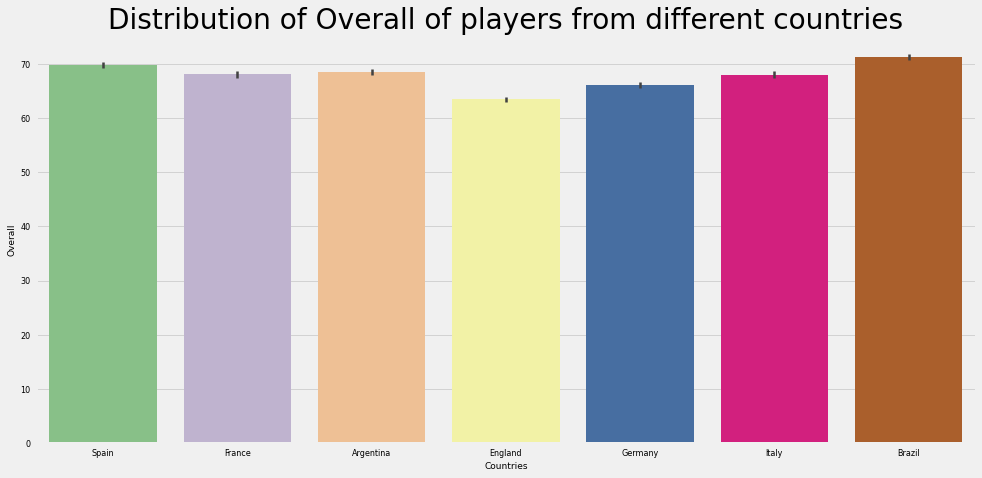

In [25]:
#Every Nations' Player and their weights
some_countries= ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries= data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize']= (15, 7)
ax =sns.barplot(x= data_countries['Nationality'],y= data_countries['Overall'], palette= "Accent")
ax.set_xlabel(xlabel ='Countries', fontsize =9)

ax.set_ylabel(ylabel='Overall', fontsize=9)
ax.set_title(label ='Distribution of Overall of players from different countries', fontsize=28)
plt.show

In [26]:
#Every Nations' Player and their weights

some_countries= ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries= data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize']= (15, 7)
ax =sns.barplot(x= data_countries['Nationality'],y= data_countries['Wage'], palette= "Purples")
ax.set_xlabel(xlabel ='Countries', fontsize =9)

ax.set_ylabel(ylabel='Overall', fontsize=9)
ax.set_title(label ='Distribution of Wage of players from different countries', fontsize=28)
plt.show

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<function matplotlib.pyplot.show(close=None, block=None)>

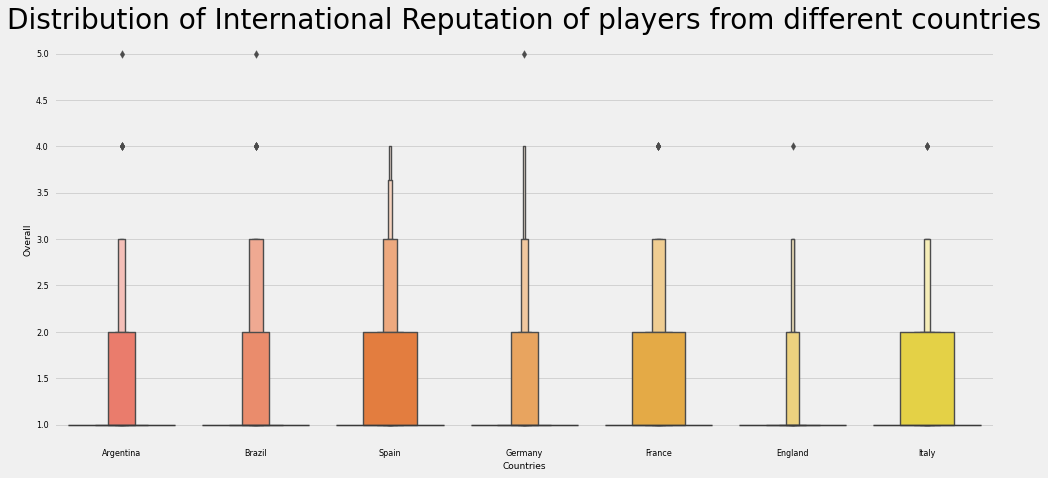

In [27]:
#Every Nations' Player and their international reputation
some_countries= ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries= data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize']= (15, 7)
ax =sns.boxenplot(x= data_countries['Nationality'],y= data_countries['International Reputation'], palette= "autumn")
ax.set_xlabel(xlabel ='Countries', fontsize =9)

ax.set_ylabel(ylabel='Overall', fontsize=9)
ax.set_title(label ='Distribution of International Reputation of players from different countries', fontsize=28)
plt.show

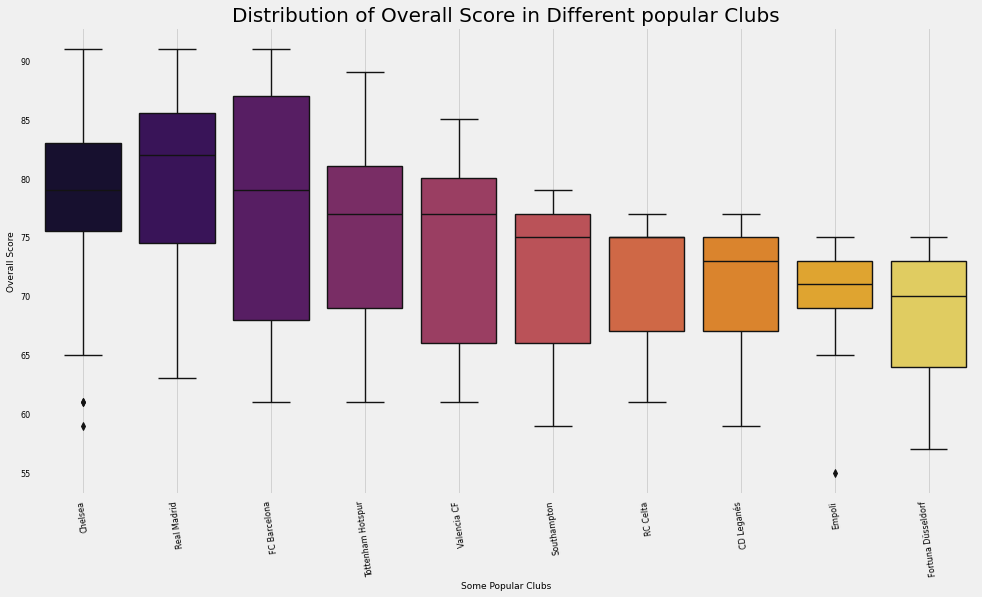

In [28]:
# distribution of overall score in different populer club 

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf'
              ,'Manchestar City','Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','Real Madrid')

data_clubs = data.loc[data['Club'].isin (some_clubs) & data['Overall']]
plt.rcParams['figure.figsize'] = (15, 8)
ax= sns.boxplot (x = data_clubs ['Club'], y = data_clubs [ 'Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9) 
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 98)

plt.grid()
plt.show()

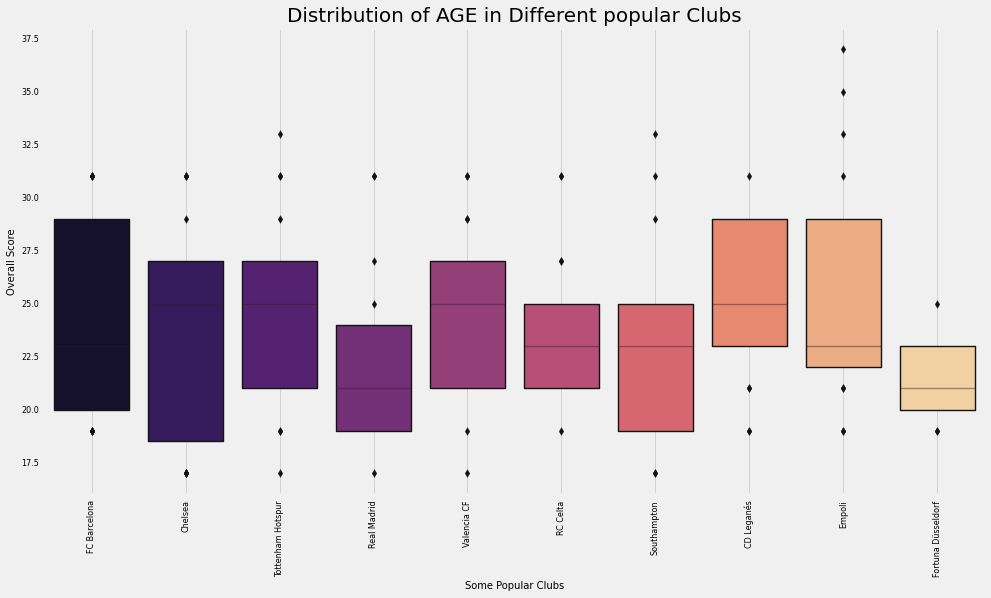

In [29]:
# # Distribution of ages in some popular club

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf'
              ,'Manchestar City','Tottenham Hotspur','FC Barcelona','Valencia CF','Chelsea','Real Madrid')

data_clubs = data.loc[data['Club'].isin (some_clubs) & data['Age']]
plt.rcParams['figure.figsize'] = (15, 8)
ax= sns.boxenplot (x = data_clubs ['Club'], y = data_clubs [ 'Age'], palette = 'magma')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 10)
ax.set_title(label = 'Distribution of AGE in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)

plt.grid()
plt.show()

In [30]:
# Disstribution of Wages in some Popular Clubs

some_clubs= ('CD Leganés', 'Southampton','RC Celta', 'Empoli', 
             'Fortuna Düsseldorf', 'Ranchestar City', 'Tottenham Hotspur','FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club =data.loc[data['Club'].isin(some_clubs) & data["Wage"]]

plt.rcParams['figure.figsize']= (15, 8) 
ax= sns.boxplot(x= 'Club', y= 'Wage', data= data_club, palette ='magma')

ax.set_xlabel(xlabel =' Names of some popular Clubs', fontsize= 10) 
ax.set_ylabel(ylabel= 'Distribution', fontsize= 10)

ax.set_title(label ="Disstribution of Wages in some Popular Clubs", fontsize=20)

plt.xticks(rotation = 90)

plt.grid()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

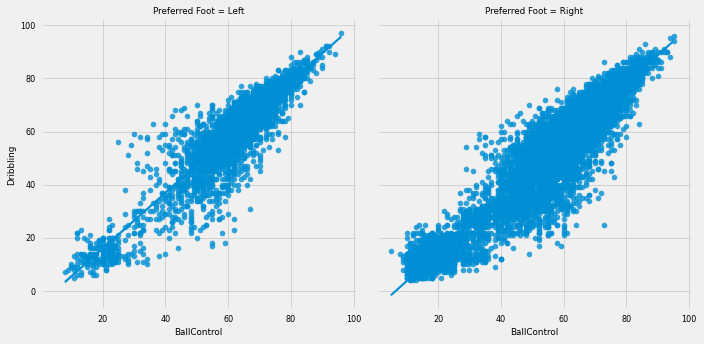

In [31]:
# comparing the performance of left-footed and right-footed footballers 
#ballcontrol vs dribbing

sns.lmplot(x='BallControl', y ='Dribbling', data=data, col ='Preferred Foot')
plt.show()

In [32]:
#Query Analysis




# best players per each position with their age, club, and nationality based on their overall scores
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
'Nationality', 'Overall']].sort_values(by= 'Overall',
ascending=False).style.background_gradient(cmap="pink")









,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [33]:
# Best player for each skill

# lets analyze the skills of player


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@Interact
def skill(skills=['Defending', 'General','Mental', 'Passing',
                  'Mobility', 'Power','Rating', 'Shooting' ], score = 75):
    return data[data[ skills] >score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by=skills,
                                      ascending=False).head(20).style.background_gradient(cmap="Blues")
skill(skills)



NameError: name 'Interact' is not defined

In [34]:

#Lets make a function to see the List of top 15 players from each country

@interact

def country(country =list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][[ 'Name', 'Position','Overall',
                                                 'Potential']].sort_values (by ='Overall', 
                                                            ascending= False).head(15).style.background_gradient(cmap='magma')


interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [35]:
#Lets make a function to see the List of top 15 players from each club

@interact

def club(club =list(data['club'].value_counts().index)):
    return data[data['club'] == club][[ 'Name', 'Position','Overall',
                                                 'Potential']].sort_values (by ='Overall', 
                                                            ascending= False).head(15).style.background_gradient(cmap='inferno')

KeyError: 'club'

In [36]:
# finding 15 youngest player from the Dataset

youngest = data[data['Age']==16] [['Name', 'Age', 'Nationality', 'Overall']]
youngest.sort_values(by= 'Overall', ascending = False).head().style.background_gradient(cmap = 'magma')

,Name,Age,Nationality,Overall
11457,W. Geubbels,16,France,64
11732,A. Taoui,16,France,64
12496,Pelayo Morilla,16,Spain,63
12828,Guerrero,16,Spain,63
13293,H. Massengo,16,France,62
